# *Optical Tweezers* | Lab-Session #1
## Jan-20-2021 13:45

This jupyter notebook is a used to collect and analyse data during today's lab session

In [2]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

In [3]:
# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
DATA = pd.read_csv(csvs[0])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array
DATA                            # Prints pretty PANDAS data frame

List of .csv files in .
	 0 : Malus_CAL.csv


,Theta (deg),Voltage (mV),V_std (_V)
0,0,184.320,166
1,5,181.150,185
2,10,176.020,217
3,15,166.670,385
4,20,154.230,356
5,25,143.160,217
6,30,128.680,177
7,35,114.320,170
8,40,99.111,168
9,45,83.510,173


# Data Analysis

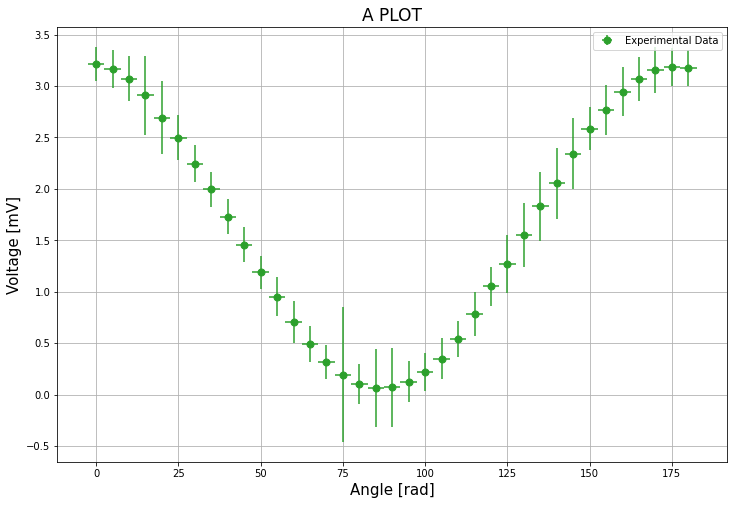

In [14]:
# Data fitting
# let's get some data x,y
Npts = 1000
x = data[0]
y = data[1]*np.pi/180
y_err = data[2]*1e-3
x_err = [2.5]*len(x)

# Example of trying to fit a function with 3 parameters 
def fit(x,a,b,c):
    return a*np.cos(b*x)**2

params, _ = curve_fit(fit,x,y,bounds=(0,(20,20,20)))

# Define the figure and plot parameters
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('A PLOT',fontsize=17)
ax.set_xlabel('Angle [rad]',fontsize=15)
ax.set_ylabel('Voltage [mV]',fontsize=15)

# Plot the actual elements
ax.errorbar(x,y,yerr = y_err, xerr = x_err, color = 'C2',ms = 7, fmt = 'o',label='Experimental Data')
# ax.plot(x,fit(x,*params), color = 'black', lw = 2, label='Fit: a=%5.3f, b=%5.3f c=%5.3f'%tuple(params))

ax.legend(fontsize = 10)
ax.grid()

In [22]:
V = 23
l = 10e-2
V*l*180/np.pi
i = 300e-3
B = 11.1*i

V*l*B

7.659